# Goal
* develop tests

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
from torch import tensor
from compSPI import transforms


In [2]:
from importlib import reload
from simSPI import geometric_micelle
reload(geometric_micelle)

<module 'simSPI.geometric_micelle' from '/Users/gw/repos/helena-fork/simSPI/simSPI/geometric_micelle.py'>

# Projected ellipsoid

See ellipse_project for how to work out the formula for a projected ellipsoid

In [38]:
scale_ = 4
scale=20*scale_
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
axis = np.array([0,0,1])
deg=20
angle = np.deg2rad(deg)
r = Rotation.from_rotvec(angle*axis).as_matrix()

proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,r)


Text(0.5, 1.0, 'Rotated about [0 0 1] by 20 deg\n a=200,b=40,c=200')

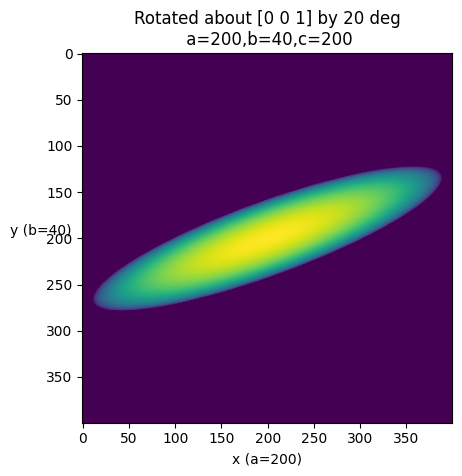

In [26]:
plt.imshow(proj_ellipsoid)
plt.xlabel(f'x (a={a})')
plt.ylabel(f'y (b={b})',rotation=0)
plt.title(f'Rotated about {axis} by {deg} deg\n a={a},b={b},c={c}')

We can check this visually, and also against the analytic fomula for an ellipsoid: $V = \frac{4}{3} \pi a b c$.

In [100]:
analytic_vol_ellipsoid = 4/3*np.pi*a*b*c

volume = proj_ellipsoid.sum()

rel_error = np.abs(analytic_vol_ellipsoid - arr_2d.sum()) / analytic_vol_ellipsoid

This is used for the test: `tests.test_geometric_micelle.projected_rotated_ellipsoid`

In [101]:
import tests.test_geometric_micelle
tests.test_geometric_micelle.test_project_rotated_ellipsoid()

In [102]:
import inspect
src_str = inspect.getsource(tests.test_geometric_micelle.test_project_rotated_ellipsoid)
print(src_str)


def test_project_rotated_ellipsoid():
  '''
  test that projecting then summing is the same as the analytical formula.
  errors arise from discretiziation on 2D array mesh, so set atol to test close enough
  '''

  scale = 5
  a = 3 * scale
  b = 2 * scale
  c = 1 * scale
  step_x = step_y = 1
  max_axis = np.max([a, b])
  x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis, max_axis, step=step_x), np.arange(-max_axis, max_axis, step=step_y))
  axis = np.array([0, 0, 1])
  deg = 45
  angle = np.deg2rad(deg)
  r = Rotation.from_rotvec(angle * axis).as_matrix()

  proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh, y_mesh, a, b, c, r)
  volume = proj_ellipsoid.sum()

  analytic_vol_ellipsoid = 4 / 3 * np.pi * a * b * c
  rel_error = np.abs(analytic_vol_ellipsoid - volume) / analytic_vol_ellipsoid

  assert np.isclose(rel_error, 0, atol=1e-3)



# Micelle structure from head and tail region of detergent
We can compose these to define regions of a micelle from the structure of a detergent (e.g. hydrophilic head group, hydrophobic tails). Note that this may be suitable or unsutiable, depending on the type of detergent

In [103]:
def inner_outer_proj(a,b,c,r,inner_shell_ratio=0.8,shell_density_ratio=1):
    proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,r)
    proj_ellipsoid_inner = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,
                                                                   a*inner_shell_ratio,
                                                                   b*inner_shell_ratio,
                                                                   c*inner_shell_ratio,
                                                                   r)

    shell = proj_ellipsoid-proj_ellipsoid_inner
    micelle = shell_density_ratio*shell + proj_ellipsoid_inner
    return micelle


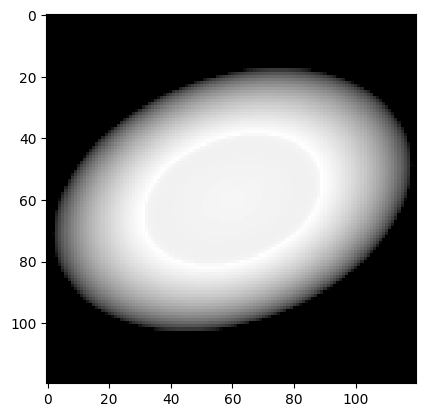

In [112]:
micelle = inner_outer_proj(a,b,c,r,inner_shell_ratio=0.5,shell_density_ratio=1.5)
plt.imshow(micelle,cmap='gray')

We can see a sharp ring at the boundary between the inner and outer ellipsoids

# Cavity
remove projected rotated cylindar

In [3]:
import tests.test_geometric_micelle
tests.test_geometric_micelle.test_project_rotated_cylinder()

else
else
else
else
about z-axis
about z-axis
90 deg, line along x-axis
90 deg, line along x-axis
90 deg, line along y-axis
90 deg, line along y-axis
90 deg, line along y-axis with z-tilt
90 deg, line along y-axis with z-tilt
90 deg, line along x-axis with z-tilt
90 deg, line along x-axis with z-tilt


In [39]:
scale=5
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))

else
else
else
else


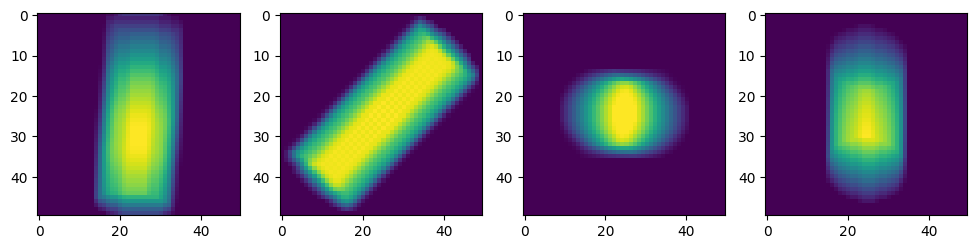

In [40]:
n_plots = 4
scale=1
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(Rotation.random(num=n_plots).as_matrix()):
    proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),tensor(y_mesh),radius_circle=scale*10,h=scale*50,rotation=rotation)
    axes[idx].imshow(proj_cylinder)

In [41]:
scale_ = 8
scale=5*scale_
a=5*scale
b=1*scale
c=5*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))

else
else
else
else


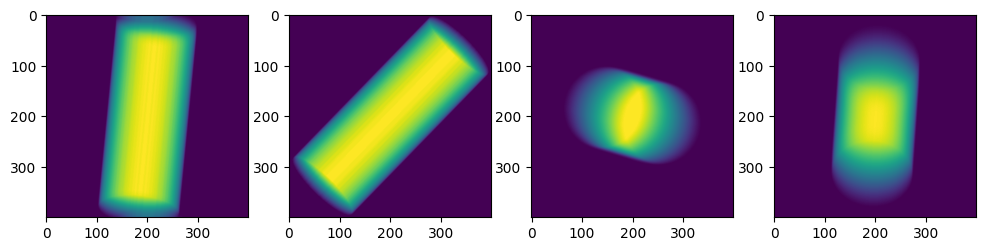

In [42]:
n_plots = 4
scale=scale_
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(Rotation.random(num=n_plots).as_matrix()):
    proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),tensor(y_mesh),radius_circle=scale*10,h=scale*50,rotation=rotation)
    axes[idx].imshow(proj_cylinder)

We can see the artefacts dissapear as we up sample.

To a certain extend, these artefacts go away when we downsample after through Fourier cropping. Thus we can first upsample, and then down sample in Fourier space.

else
else
else
else


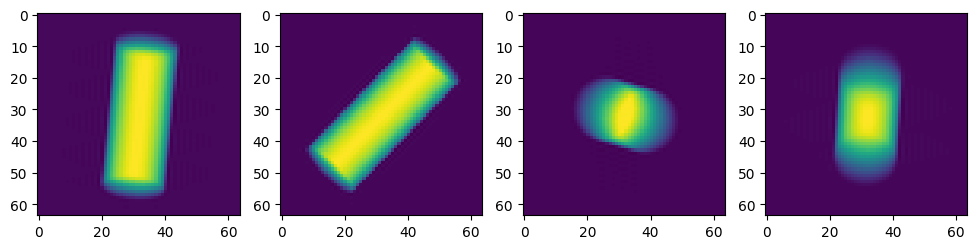

In [74]:
n_plots = 4
scale=scale_
np.random.seed(1)
fig,axes = plt.subplots(ncols=n_plots,figsize=(3*n_plots,3))
for idx, rotation in enumerate(Rotation.random(num=n_plots).as_matrix()):
    n_full = x_mesh.shape[0]
    n_crop = n_full // scale
    proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),
                                                               tensor(y_mesh),
                                                               radius_circle=scale*10,
                                                               h=scale*50,
                                                               rotation=rotation,
                                                               n_crop=n_crop)  
    axes[idx].imshow(proj_cylinder)

## subracting out cavity inside micelle
* the convention is that the cylinder is aligned with the z-axis with id rotation


### top down micelle

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

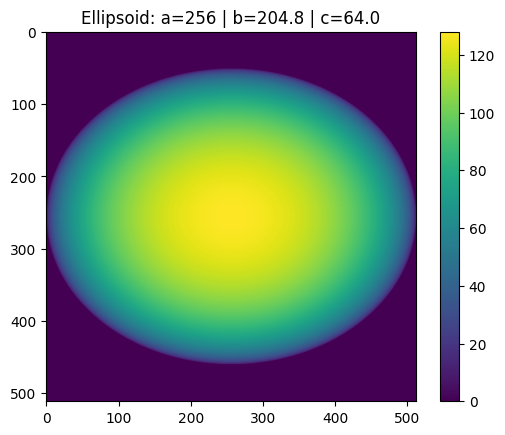

In [101]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
rotation = np.eye(3)
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

90 deg, line along x-axis


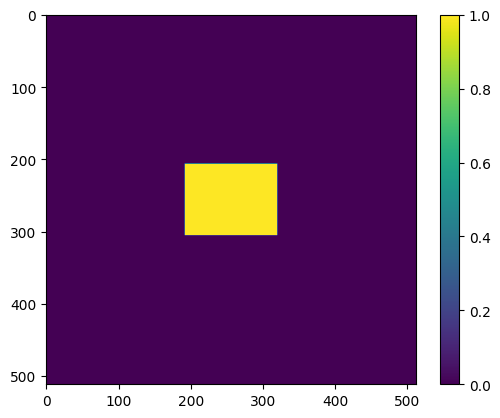

In [117]:
radius_circle = 50
h = c*2
proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),
                                                               tensor(y_mesh),
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation)
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

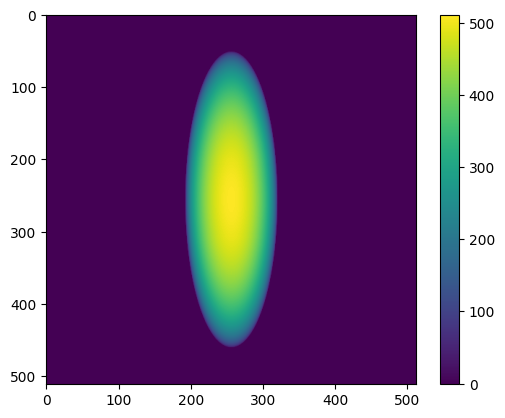

In [119]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

c in the ellipsoid is 32, so the max value is 32. If 

The height of the cylinder is 32 so the intensity is $2 \cdot 32 = 64$.

If we subtract them we get a hole with zero density at the top, and a bit of negative density in the edges (from subtracting too much off)

### Side view micelle

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

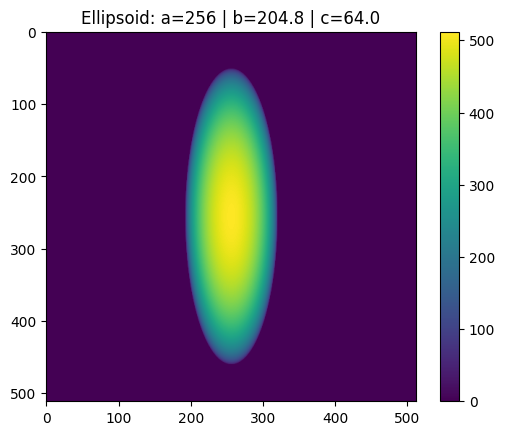

In [120]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
rotation = Rotation.from_euler('XZY',[0,0,90],degrees=True).as_matrix()
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

90 deg, line along x-axis


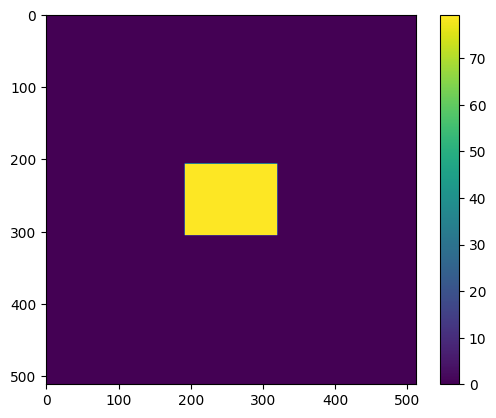

In [123]:

radius_circle = 50
h = c*2
volume = np.pi*radius_circle**2*h
proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),
                                                               tensor(y_mesh),
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation)
proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

The intensity is scaled such that the volume is $\pi r^2 h$

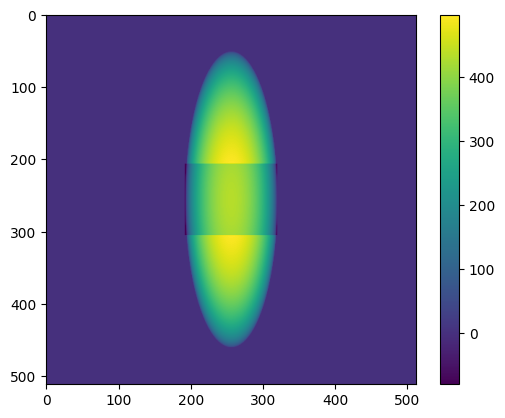

In [124]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

We see the edges go down to zero, with some artefacts at the top where the cylinder peeks outside the micelle

## Micelle: arbitrary rotation

Text(0.5, 1.0, 'Ellipsoid: a=256 | b=204.8 | c=64.0')

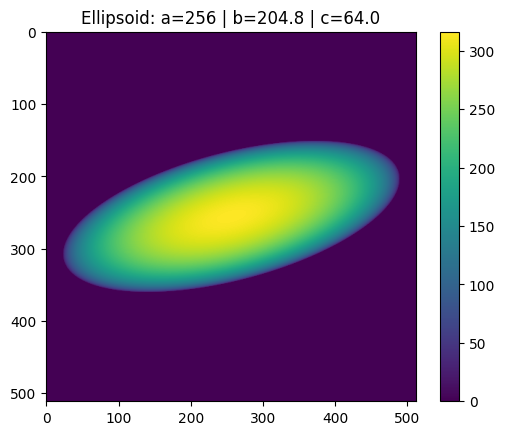

In [143]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))
# rotation = Rotation.from_euler('XZY',[45,45,45],degrees=True).as_matrix()
np.random.seed(0)
rotation = Rotation.random().as_matrix()
proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

ax = plt.imshow(proj_ellipsoid)
plt.colorbar(ax)
plt.title(f'Ellipsoid: a={a} | b={b} | c={c}')

else


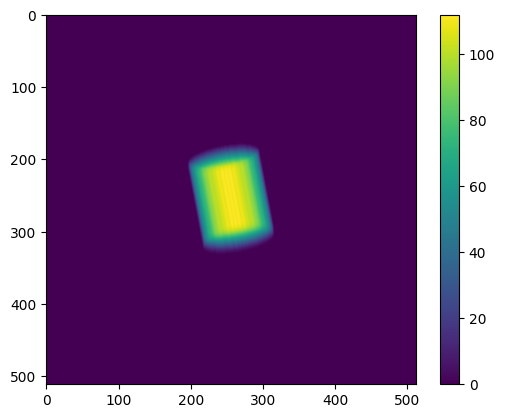

In [144]:
radius_circle = 50
h = c*2
volume = np.pi*radius_circle**2*h
proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),
                                                               tensor(y_mesh),
                                                               radius_circle=radius_circle,
                                                               h=h,
                                                               rotation=rotation.T)
proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
ax = plt.imshow(proj_cylinder)
plt.colorbar(ax)

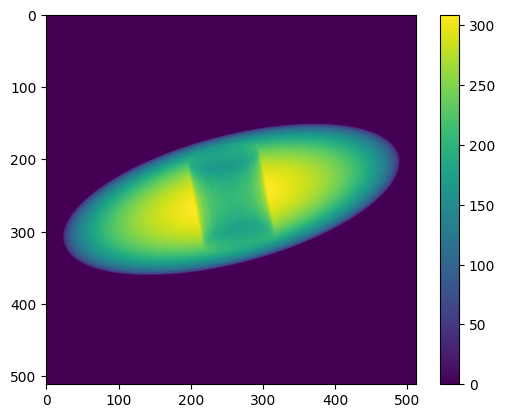

In [145]:
micelle = proj_ellipsoid - proj_cylinder

ax = plt.imshow(micelle)
plt.colorbar(ax)

else
else
else
else
else
else
else
else
else
else


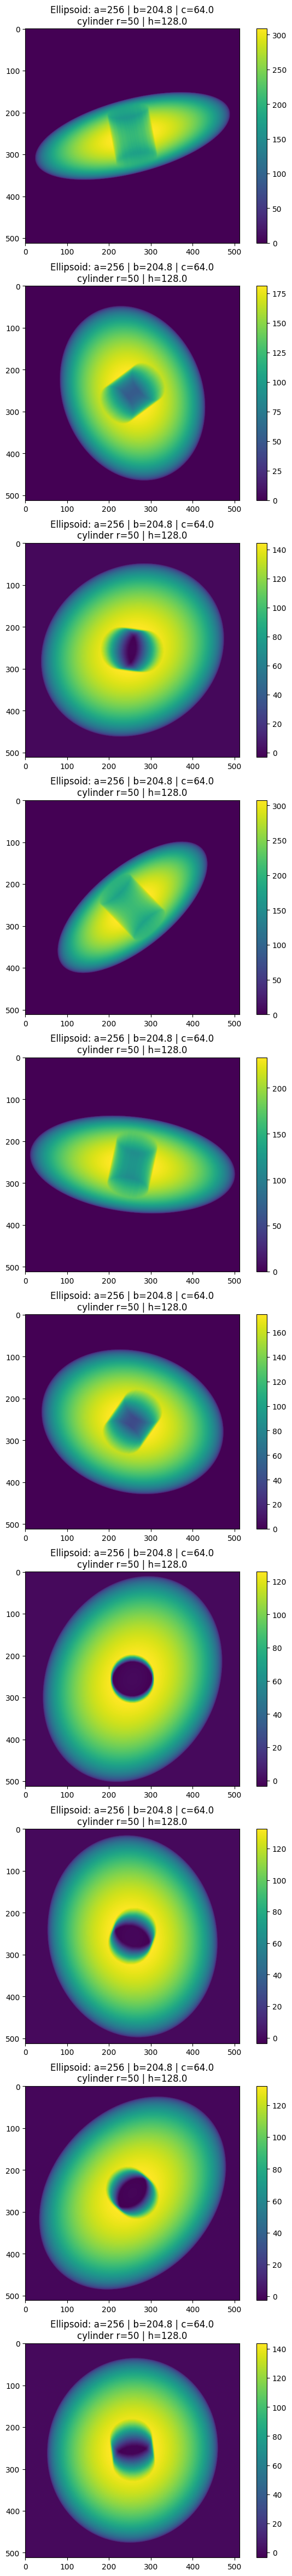

In [186]:
scale=256
a=1*scale
b=0.8*scale
c=1/4*scale
step_x = step_y = 1
max_axis = np.max([a,b])
x_mesh, y_mesh = np.meshgrid(np.arange(-max_axis,max_axis,step=step_x),np.arange(-max_axis,max_axis,step=step_y))

n_plots = 10
fig, axes = plt.subplots(nrows=n_plots, figsize=(8,6*n_plots))
np.random.seed(0)
for idx, rotation in enumerate(Rotation.random(num=n_plots).as_matrix()):

    proj_ellipsoid = geometric_micelle.project_rotated_ellipsoid(x_mesh,y_mesh,a,b,c,rotation)

    radius_circle = 50
    h = c*2
    volume = np.pi*radius_circle**2*h
    proj_cylinder = geometric_micelle.project_rotated_cylinder(tensor(x_mesh),
                                                                   tensor(y_mesh),
                                                                   radius_circle=radius_circle,
                                                                   h=h,
                                                                   rotation=rotation.T)
    proj_cylinder = volume*proj_cylinder / proj_cylinder.sum()
    
    micelle = proj_ellipsoid - proj_cylinder
    
    ax = axes[idx].imshow(micelle)
    fig.colorbar(ax,ax=axes[idx])

    axes[idx].set_title(f'Ellipsoid: a={a} | b={b} | c={c}' + '\n' + f'cylinder r={radius_circle} | h={h}')


# Blurring
This analytical approximatin treats atoms as if they are infinitesimaly small. In reality there are discrete atoms that have a Gaussian-like kernel 